## Code to get slope and aspect from DTM

In [1]:
from osgeo import gdal

In [1]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import elevation
import richdem as rd
import rasterio  


##### Load DTM file in DEM_path and provide output paths to save slope and aspect


In [8]:
def calculate_slope_aspect_richdem(DEM_path):

    """
    Calculates the slope and aspect from a Digital Elevation Model (DEM) using the RichDEM library.

    - DEM_path: File path to the DEM raster file.

    Slope is calculated in degrees and represents the steepness or incline of the terrain.
    Aspect is the compass direction that the terrain faces.

    Returns:
    - slope: A 2D numpy array representing the slope of the terrain.
    - aspect: A 2D numpy array representing the aspect of the terrain.

    This function is useful for terrain analysis in geographic studies and environmental modeling.
    """
    dem = rd.LoadGDAL(DEM_path)
    slope = rd.TerrainAttribute(dem, attrib='slope_degrees')
    aspect = rd.TerrainAttribute(dem, attrib='aspect')
    return slope, aspect

DEM_path = r"C:\Users\JANUSHI SHASTRI\Desktop\CIRES_PROJECT\Drone Data\drive-download-20230711T205208Z-001\niwot_6_23_2022_dtm_cropped.tif"
slope_richdem, aspect_richdem = calculate_slope_aspect_richdem(DEM_path)

# Save slope and aspect to .tif
driver = gdal.GetDriverByName("GTiff")

# Define metadata
metadata = {'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': slope_richdem.shape[1], 'height': slope_richdem.shape[0], 'count': 1, 'crs': '+proj=latlong', 'transform': None}

# Save slope
with rasterio.open('slope_new.tif', 'w', **metadata) as dst:
    dst.write(slope_richdem, 1)

# Save aspect
with rasterio.open('aspect_new.tif', 'w', **metadata) as dst:
    dst.write(aspect_richdem, 1)

c:\Users\JANUSHI SHASTRI\anaconda3\envs\cires-demo\lib\site-packages\rasterio\__init__.py:329: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


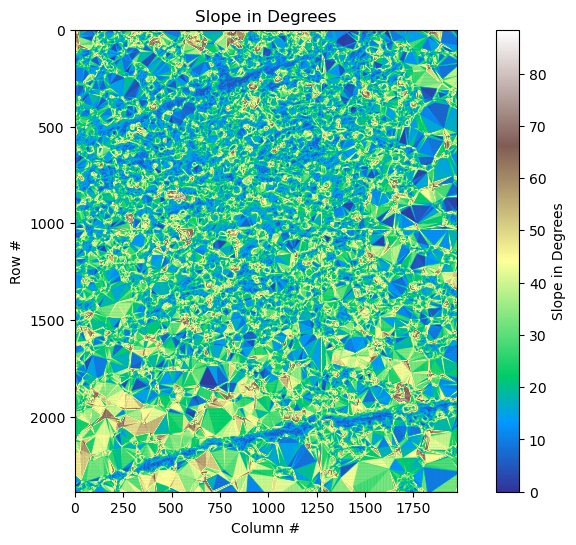

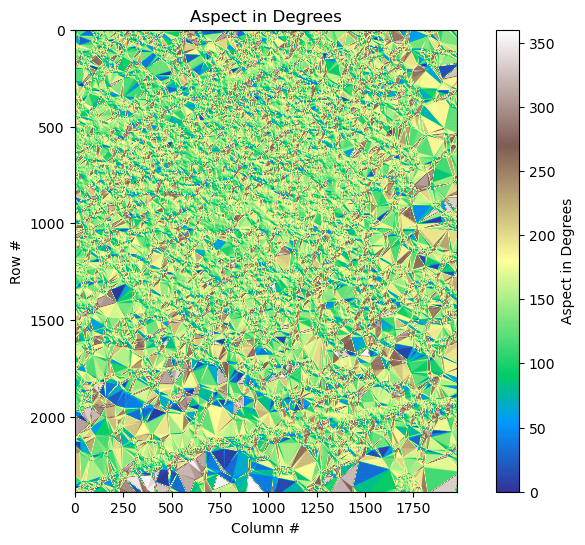

In [9]:
def plot_raster(data, title):
    """
    Plots a raster dataset using matplotlib.

    - data: A 2D numpy array representing a raster dataset (e.g., slope, aspect, elevation).
    - title: A string that will be used as the title of the plot and the label of the colorbar.

    This function creates a visually intuitive representation of raster data. It is useful for quickly 
    visualizing geospatial data like DEMs, slope, and aspect maps.

    The function performs the following steps:
    1. Creates a figure with specified dimensions.
    2. Plots the data using the 'terrain' colormap to provide an intuitive color scheme.
    3. Adds a colorbar for reference, with the title as its label.
    4. Sets the plot title and labels for x (Column #) and y (Row #) axes.
    5. Displays the plot.
    """

    plt.figure(figsize=(10, 6))
    plt.imshow(data, cmap='terrain')
    plt.colorbar(label=title)
    plt.title(title)
    plt.xlabel('Column #')
    plt.ylabel('Row #')
    plt.show()

# Plotting the slope
plot_raster(slope_richdem, 'Slope in Degrees')

# Plotting the aspect
plot_raster(aspect_richdem, 'Aspect in Degrees')